In [187]:
import pandas as pd

# Ler o arquivo CSV
df = pd.read_csv("mortalidade97.csv", delimiter=";", encoding="utf-8")
df




,Ano do obito,Regiao Sudeste
0,1996,21054
1,1997,18597
2,1998,19696
3,1999,18286
4,2000,17761
5,2001,18352
6,2002,20226
7,2003,21359
8,2004,23040
9,2005,21139


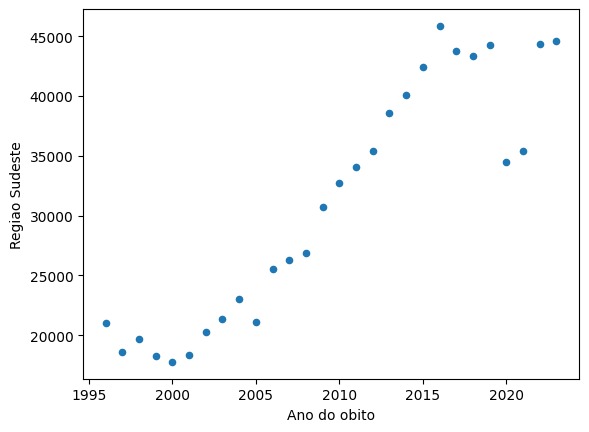

In [188]:
df.plot(kind="scatter", x="Ano do obito", y="Regiao Sudeste");


In [189]:
# Calcular a diferença de óbitos de ano para ano
df['diferenca_obitos'] = df['Regiao Sudeste'].diff()

# Criar uma variável binária de aumento (1) ou diminuição (0)
df['aumento_diminui'] = (df['diferenca_obitos'] > 0).astype(int)

# Remover valores ausentes após o cálculo da diferença
df.dropna(inplace=True)


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report

# Selecionar variáveis independentes e dependentes
X = df[['Ano do obito']]  # Ano do óbito como variável independente
y_class = df['aumento_diminui']  # Aumento ou diminuição de óbitos (classificação)
y_reg = df['Regiao Sudeste']  # Número de óbitos (regressão)

# Dividir os dados em treinamento e teste
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(X, y_class, y_reg, test_size=0.3, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo de regressão logística para previsão de aumento ou diminuição
modelo_classificacao = LogisticRegression()
modelo_classificacao.fit(X_train_scaled, y_class_train)

# Treinar o modelo de regressão linear para prever o número de óbitos
modelo_regressao = LinearRegression()
modelo_regressao.fit(X_train_scaled, y_reg_train)

# Fazer previsões de aumento ou diminuição
y_pred_class = modelo_classificacao.predict(X_test_scaled)

# Fazer previsões do número de óbitos
y_pred_reg = modelo_regressao.predict(X_test_scaled)

# Avaliar o modelo de classificação
print("Relatório de classificação:")
print(classification_report(y_class_test, y_pred_class))

# Exibir algumas previsões
print("\nPrevisões de aumento ou diminuição:")
print(["Aumento" if pred == 1 else "Diminuição" for pred in y_pred_class])

print("\nPrevisões do número de óbitos:")
print(y_pred_reg)


Relatório de classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      1.00      0.80         6

    accuracy                           0.67         9
   macro avg       0.33      0.50      0.40         9
weighted avg       0.44      0.67      0.53         9


Previsões de aumento ou diminuição:
['Aumento', 'Aumento', 'Aumento', 'Aumento', 'Aumento', 'Aumento', 'Aumento', 'Aumento', 'Aumento']

Previsões do número de óbitos:
[25297.02860488 31010.80286049 26439.78345601 40152.84166945
 16154.98979592 28725.29315825 34439.06741385 35581.82226497
 29868.04800937]


c:\Users\bamfn\Desktop\UFV\IA\projeto2\projeto-ml\projeto-ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bamfn\Desktop\UFV\IA\projeto2\projeto-ml\projeto-ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bamfn\Desktop\UFV\IA\projeto2\projeto-ml\projeto-ml\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa